# Imports and settings

In [609]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [610]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Initial Data loading and understanding

In [611]:
df = pd.read_csv('../Data Collection/Datasets/batdongsan.com/raw/batdongsan.csv')
# Select only the specific columns you're interested in
df.head()

,Diện tích,Hướng ban công,Hướng nhà,Mặt tiền,Mức giá,Mức giá internet,Mức giá nước,Mức giá điện,Nội thất,Pháp lý,Số phòng ngủ,"Số phòng tắm, vệ sinh",Số tầng,Thời gian dự kiến vào ở,Tiện ích,title,url,Đường vào
0,107 m²,NaN,NaN,NaN,Thỏa thuận,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,3 phòng,2 phòng,NaN,NaN,NaN,"Bán căn hộ Han Jardin T6 và T7 view hồ, giá từ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,NaN
1,65 m²,NaN,NaN,NaN,"3,4 tỷ",NaN,NaN,NaN,Đầy đủ,Sổ đỏ/ Sổ hồng,2 phòng,2 phòng,NaN,NaN,NaN,Gia đình em bán căn hộ tòa Park - 65m2 - full ...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,NaN
2,50 m²,NaN,Bắc,4 m,"6,55 tỷ",NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,NaN,NaN,NaN,NaN,NaN,"Bán đất dịch vụ 3 phường Đồng Mai, quận Hà Đôn...",https://batdongsan.com.vn/ban-dat-duong-co-ban...,13 m
3,150 m²,NaN,Đông - Nam,5 m,"7,99 tỷ",NaN,NaN,NaN,Đầy đủ,Sổ đỏ/ Sổ hồng,2 phòng,1 phòng,1 tầng,NaN,NaN,Giảm 500 Triệu Nhà C4 5mx30m Mặt Tiền Đường Ph...,https://batdongsan.com.vn/ban-nha-mat-pho-duon...,20 m
4,62 m²,NaN,NaN,NaN,"1,99 tỷ",NaN,NaN,NaN,NaN,Hợp đồng mua bán,2 phòng,2 phòng,NaN,NaN,NaN,GIA ĐÌNH CÓ 2 CĂN 62M2 HƯỚNG ĐÔNG NAM CẦN BÁN....,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,NaN


In [612]:
print("\nBasic information:")
df.info()


Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17702 entries, 0 to 17701
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Diện tích                17701 non-null  object
 1   Hướng ban công           3619 non-null   object
 2   Hướng nhà                6021 non-null   object
 3   Mặt tiền                 8154 non-null   object
 4   Mức giá                  17701 non-null  object
 5   Mức giá internet         250 non-null    object
 6   Mức giá nước             367 non-null    object
 7   Mức giá điện             398 non-null    object
 8   Nội thất                 7969 non-null   object
 9   Pháp lý                  13624 non-null  object
 10  Số phòng ngủ             10069 non-null  object
 11  Số phòng tắm, vệ sinh    9717 non-null   object
 12  Số tầng                  5438 non-null   object
 13  Thời gian dự kiến vào ở  438 non-null    object
 14  Tiện ích          

In [613]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Diện tích,Hướng ban công,Hướng nhà,Mặt tiền,Mức giá,Mức giá internet,Mức giá nước,Mức giá điện,Nội thất,Pháp lý,Số phòng ngủ,"Số phòng tắm, vệ sinh",Số tầng,Thời gian dự kiến vào ở,Tiện ích,title,url,Đường vào
count,17701,3619,6021,8154,17701,250,367,398,7969,13624,10069,9717,5438,438,278,17701,17701,6916
unique,1694,8,8,334,1459,2,3,3,386,147,49,48,15,4,7,10405,10431,115
top,100 m²,Đông - Nam,Đông - Nam,5 m,Thỏa thuận,Thỏa thuận,Theo nhà cung cấp,Theo nhà cung cấp,Đầy đủ,Sổ đỏ/ Sổ hồng,2 phòng,2 phòng,3 tầng,Ở ngay,"Camera, Bảo vệ, PCCC","Ms Bích, Căn góc biển Sun Costa Residence, giá...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,6 m
freq,588,1237,1306,1387,2380,219,284,310,3860,10082,3929,4615,1199,341,148,200,200,837


In [614]:
# Choosing relevant columns
df = df[['Diện tích', 'Hướng ban công', 'Hướng nhà', 'Mặt tiền', 'Mức giá', 'Nội thất', 'Pháp lý', 'Số phòng ngủ', 'Số phòng tắm, vệ sinh', 'Số tầng', 'title', 'Đường vào']]

## Duplicate

In [615]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 7271


In [616]:
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New number of rows: {len(df)}")

Duplicates removed. New number of rows: 10431


## Missing value

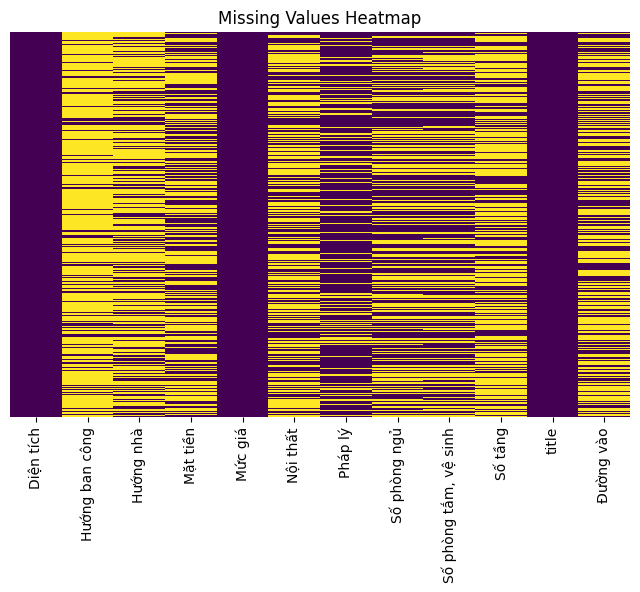

In [617]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [618]:
# Check stats of missing values
missing_stats = df.isnull().sum()
missing_stats = missing_stats[missing_stats > 0]
missing_stats = missing_stats.reset_index()
missing_stats.columns = ['Column', 'Missing Values']
missing_stats['Percentage'] = (missing_stats['Missing Values'] / len(df)) * 100
print("\nMissing values statistics:")
print(missing_stats)


Missing values statistics:
                   Column  Missing Values  Percentage
0               Diện tích               1        0.01
1          Hướng ban công            8471       81.21
2               Hướng nhà            7084       67.91
3                Mặt tiền            5358       51.37
4                 Mức giá               1        0.01
5                Nội thất            5696       54.61
6                 Pháp lý            2367       22.69
7            Số phòng ngủ            4429       42.46
8   Số phòng tắm, vệ sinh            4566       43.77
9                 Số tầng            6616       63.43
10                  title               1        0.01
11              Đường vào            6108       58.56


# Type conversion?

In [619]:
df.head()

,Diện tích,Hướng ban công,Hướng nhà,Mặt tiền,Mức giá,Nội thất,Pháp lý,Số phòng ngủ,"Số phòng tắm, vệ sinh",Số tầng,title,Đường vào
0,107 m²,NaN,NaN,NaN,Thỏa thuận,NaN,Sổ đỏ/ Sổ hồng,3 phòng,2 phòng,NaN,"Bán căn hộ Han Jardin T6 và T7 view hồ, giá từ...",NaN
1,65 m²,NaN,NaN,NaN,"3,4 tỷ",Đầy đủ,Sổ đỏ/ Sổ hồng,2 phòng,2 phòng,NaN,Gia đình em bán căn hộ tòa Park - 65m2 - full ...,NaN
2,50 m²,NaN,Bắc,4 m,"6,55 tỷ",NaN,Sổ đỏ/ Sổ hồng,NaN,NaN,NaN,"Bán đất dịch vụ 3 phường Đồng Mai, quận Hà Đôn...",13 m
3,150 m²,NaN,Đông - Nam,5 m,"7,99 tỷ",Đầy đủ,Sổ đỏ/ Sổ hồng,2 phòng,1 phòng,1 tầng,Giảm 500 Triệu Nhà C4 5mx30m Mặt Tiền Đường Ph...,20 m
4,62 m²,NaN,NaN,NaN,"1,99 tỷ",NaN,Hợp đồng mua bán,2 phòng,2 phòng,NaN,GIA ĐÌNH CÓ 2 CĂN 62M2 HƯỚNG ĐÔNG NAM CẦN BÁN....,NaN


## Area, bedrooms, floors and price

In [620]:
# Convert area, bedrooms, floors, and price to numeric types

# --- Area --- 
# Extracts numbers (e.g., "80", "36.5") from strings like "80 m2"
# User request: "1.111" should mean 1111, so dots are thousand separators. Commas are decimal separators.
area_series = df['Diện tích'].astype(str)
# Remove dots (thousand separators)
area_series_no_dots = area_series.str.replace(r'\.', '', regex=True)
# Replace commas with dots (decimal separators)
area_series_comma_as_dot = area_series_no_dots.str.replace(r',', '.', regex=True)
# Extract the number part
df['Diện tích'] = pd.to_numeric(area_series_comma_as_dot.str.extract(r'(\d+(?:\.\d+)?)', expand=False), errors='coerce')
df['Diện tích'] = df['Diện tích'].fillna(0)

# --- Bedrooms ---
df['Số phòng ngủ'] = pd.to_numeric(df['Số phòng ngủ'].astype(str).str.extract(r'(\d+)', expand=False), errors='coerce').astype('Int64')
df['Số phòng ngủ'] = df['Số phòng ngủ'].fillna(0)

# --- Floors ---
df['Số tầng'] = pd.to_numeric(df['Số tầng'].astype(str).str.extract(r'(\d+)', expand=False), errors='coerce').astype('Int64')
df['Số tầng'] = df['Số tầng'].fillna(0)

# --- Price ---
def parse_price(price_str):
    if pd.isna(price_str):
        return np.nan

    price_str_lower = str(price_str).lower()

    if 'thỏa thuận' in price_str_lower:
        return np.nan

    cleaned_price_str = price_str_lower.replace(',', '.')
    num_part_match = re.search(r'(\d+(?:\.\d+)?)', cleaned_price_str)
    if not num_part_match:
        return np.nan

    num_val = float(num_part_match.group(1))
    if 'tháng' in price_str_lower:
        return np.nan
    if 'tỷ' in price_str_lower:
        return num_val * 1e3  # Billion to million
    elif 'triệu' in price_str_lower:
        return num_val  # Million
    elif 'triệu/m' in price_str_lower:
        return num_val * df['Diện tích']  # Million per square meter
    return num_val /1e6  # Default to million

df['Mức giá'] = df['Mức giá'].apply(parse_price)

# Remove invalid 'Mức giá' entries (null or zero)
df = df[df['Mức giá'].notnull() & (df['Mức giá'] != 0)]

# --- Toilets, bathroom ---
df['Số phòng tắm, vệ sinh'] = df['Số phòng tắm, vệ sinh'].astype(str).str.extract(r'(\d+)', expand=False)
df['Số phòng tắm, vệ sinh'] = pd.to_numeric(df['Số phòng tắm, vệ sinh'], errors='coerce').astype('Int64')
df['Số phòng tắm, vệ sinh'] = df['Số phòng tắm, vệ sinh'].fillna(0)

# --- Road width ---
df['Đường vào'] = df['Đường vào'].astype(str).str.extract(r'(\d+)', expand=False)
df['Đường vào'] = pd.to_numeric(df['Đường vào'], errors='coerce')
df['Đường vào'] = df['Đường vào'].fillna(0)

# --- Facade width ---
df['Mặt tiền'] = df['Mặt tiền'].astype(str).str.extract(r'(\d+)', expand=False)
df['Mặt tiền'] = pd.to_numeric(df['Mặt tiền'], errors='coerce')
df['Mặt tiền'] = df['Mặt tiền'].fillna(0)

# --- Balcony direction ---
# Map direction to numeric values
direction_map = {
    'Bắc': int(0),
    'Đông-Bắc': int(1),
    'Đông': int(2),
    'Đông-Nam': int(3),
    'Nam': int(4),
    'Tây-Nam': int(5),
    'Tây': int(6),
    'Tây-Bắc': int(7)
}
# Map missing values in balcony direction: 0 if missing, else 1-8 based on direction_map
df['Hướng ban công'] = df['Hướng ban công'].map(direction_map)
df['Hướng ban công'] = df['Hướng ban công'].apply(lambda x: 0 if pd.isnull(x) else x + 1)
df['Hướng ban công'] = df['Hướng ban công'].astype('Int64')

# --- House direction ---
df['Hướng nhà'] = df['Hướng nhà'].map(direction_map)
df['Hướng nhà'] = df['Hướng nhà'].apply(lambda x: 0 if pd.isnull(x) else x + 1)
df['Hướng nhà'] = df['Hướng nhà'].astype('Int64')

# --- Interior ---
# Map 'Đầy đủ' to 2, 'Cơ bản' to 1, and NaN to 0
df['Nội thất'] = df['Nội thất'].apply(lambda x: 2 if x == 'Đầy đủ' else (1 if pd.notnull(x) else 0))

# --- Legality ---
# Map 2 to 'Sổ đỏ/Sổ hồng', 1 to 'Others', and 0 to NaN
df['Pháp lý'] = df['Pháp lý'].apply(lambda x: 2 if x == 'Sổ đỏ/ Sổ hồng' else (1 if pd.notnull(x) else 0))

# Rename Vietnamese columns to English equivalents
column_rename_map = {
    'Diện tích': 'area',
    'Hướng ban công': 'balcony_direction',
    'Hướng nhà': 'house_direction',
    'Mặt tiền': 'facade_width',
    'Mức giá': 'price',
    'Nội thất': 'interior',
    'Pháp lý': 'legality',
    'Số phòng ngủ': 'bedrooms',
    'Số phòng tắm, vệ sinh': 'bathrooms',
    'Số tầng': 'floors',
    'title': 'title',
    'Đường vào': 'road_width',
}
df = df.rename(columns=column_rename_map)

print("Data types after numeric conversion:")
df.info()

print("\nDataFrame head after numeric conversion:")
df.head()


Data types after numeric conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 8234 entries, 1 to 17694
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               8234 non-null   float64
 1   balcony_direction  8234 non-null   Int64  
 2   house_direction    8234 non-null   Int64  
 3   facade_width       8234 non-null   float64
 4   price              8234 non-null   float64
 5   interior           8234 non-null   int64  
 6   legality           8234 non-null   int64  
 7   bedrooms           8234 non-null   Int64  
 8   bathrooms          8234 non-null   Int64  
 9   floors             8234 non-null   Int64  
 10  title              8234 non-null   object 
 11  road_width         8234 non-null   float64
dtypes: Int64(5), float64(4), int64(2), object(1)
memory usage: 876.5+ KB

DataFrame head after numeric conversion:


,area,balcony_direction,house_direction,facade_width,price,interior,legality,bedrooms,bathrooms,floors,title,road_width
1,65.00,0,0,0.00,3400.00,2,2,2,2,0,Gia đình em bán căn hộ tòa Park - 65m2 - full ...,0.00
2,50.00,0,1,4.00,6550.00,0,2,0,0,0,"Bán đất dịch vụ 3 phường Đồng Mai, quận Hà Đôn...",13.00
3,150.00,0,0,5.00,7990.00,2,2,2,1,1,Giảm 500 Triệu Nhà C4 5mx30m Mặt Tiền Đường Ph...,20.00
4,62.00,0,0,0.00,1990.00,0,1,2,2,0,GIA ĐÌNH CÓ 2 CĂN 62M2 HƯỚNG ĐÔNG NAM CẦN BÁN....,0.00
6,120.00,0,0,7.00,7300.00,1,2,7,3,3,"Chủ giảm 1 tỷ còn 7,3 tỷ TL nhà 3 tầng mới mặt...",4.00


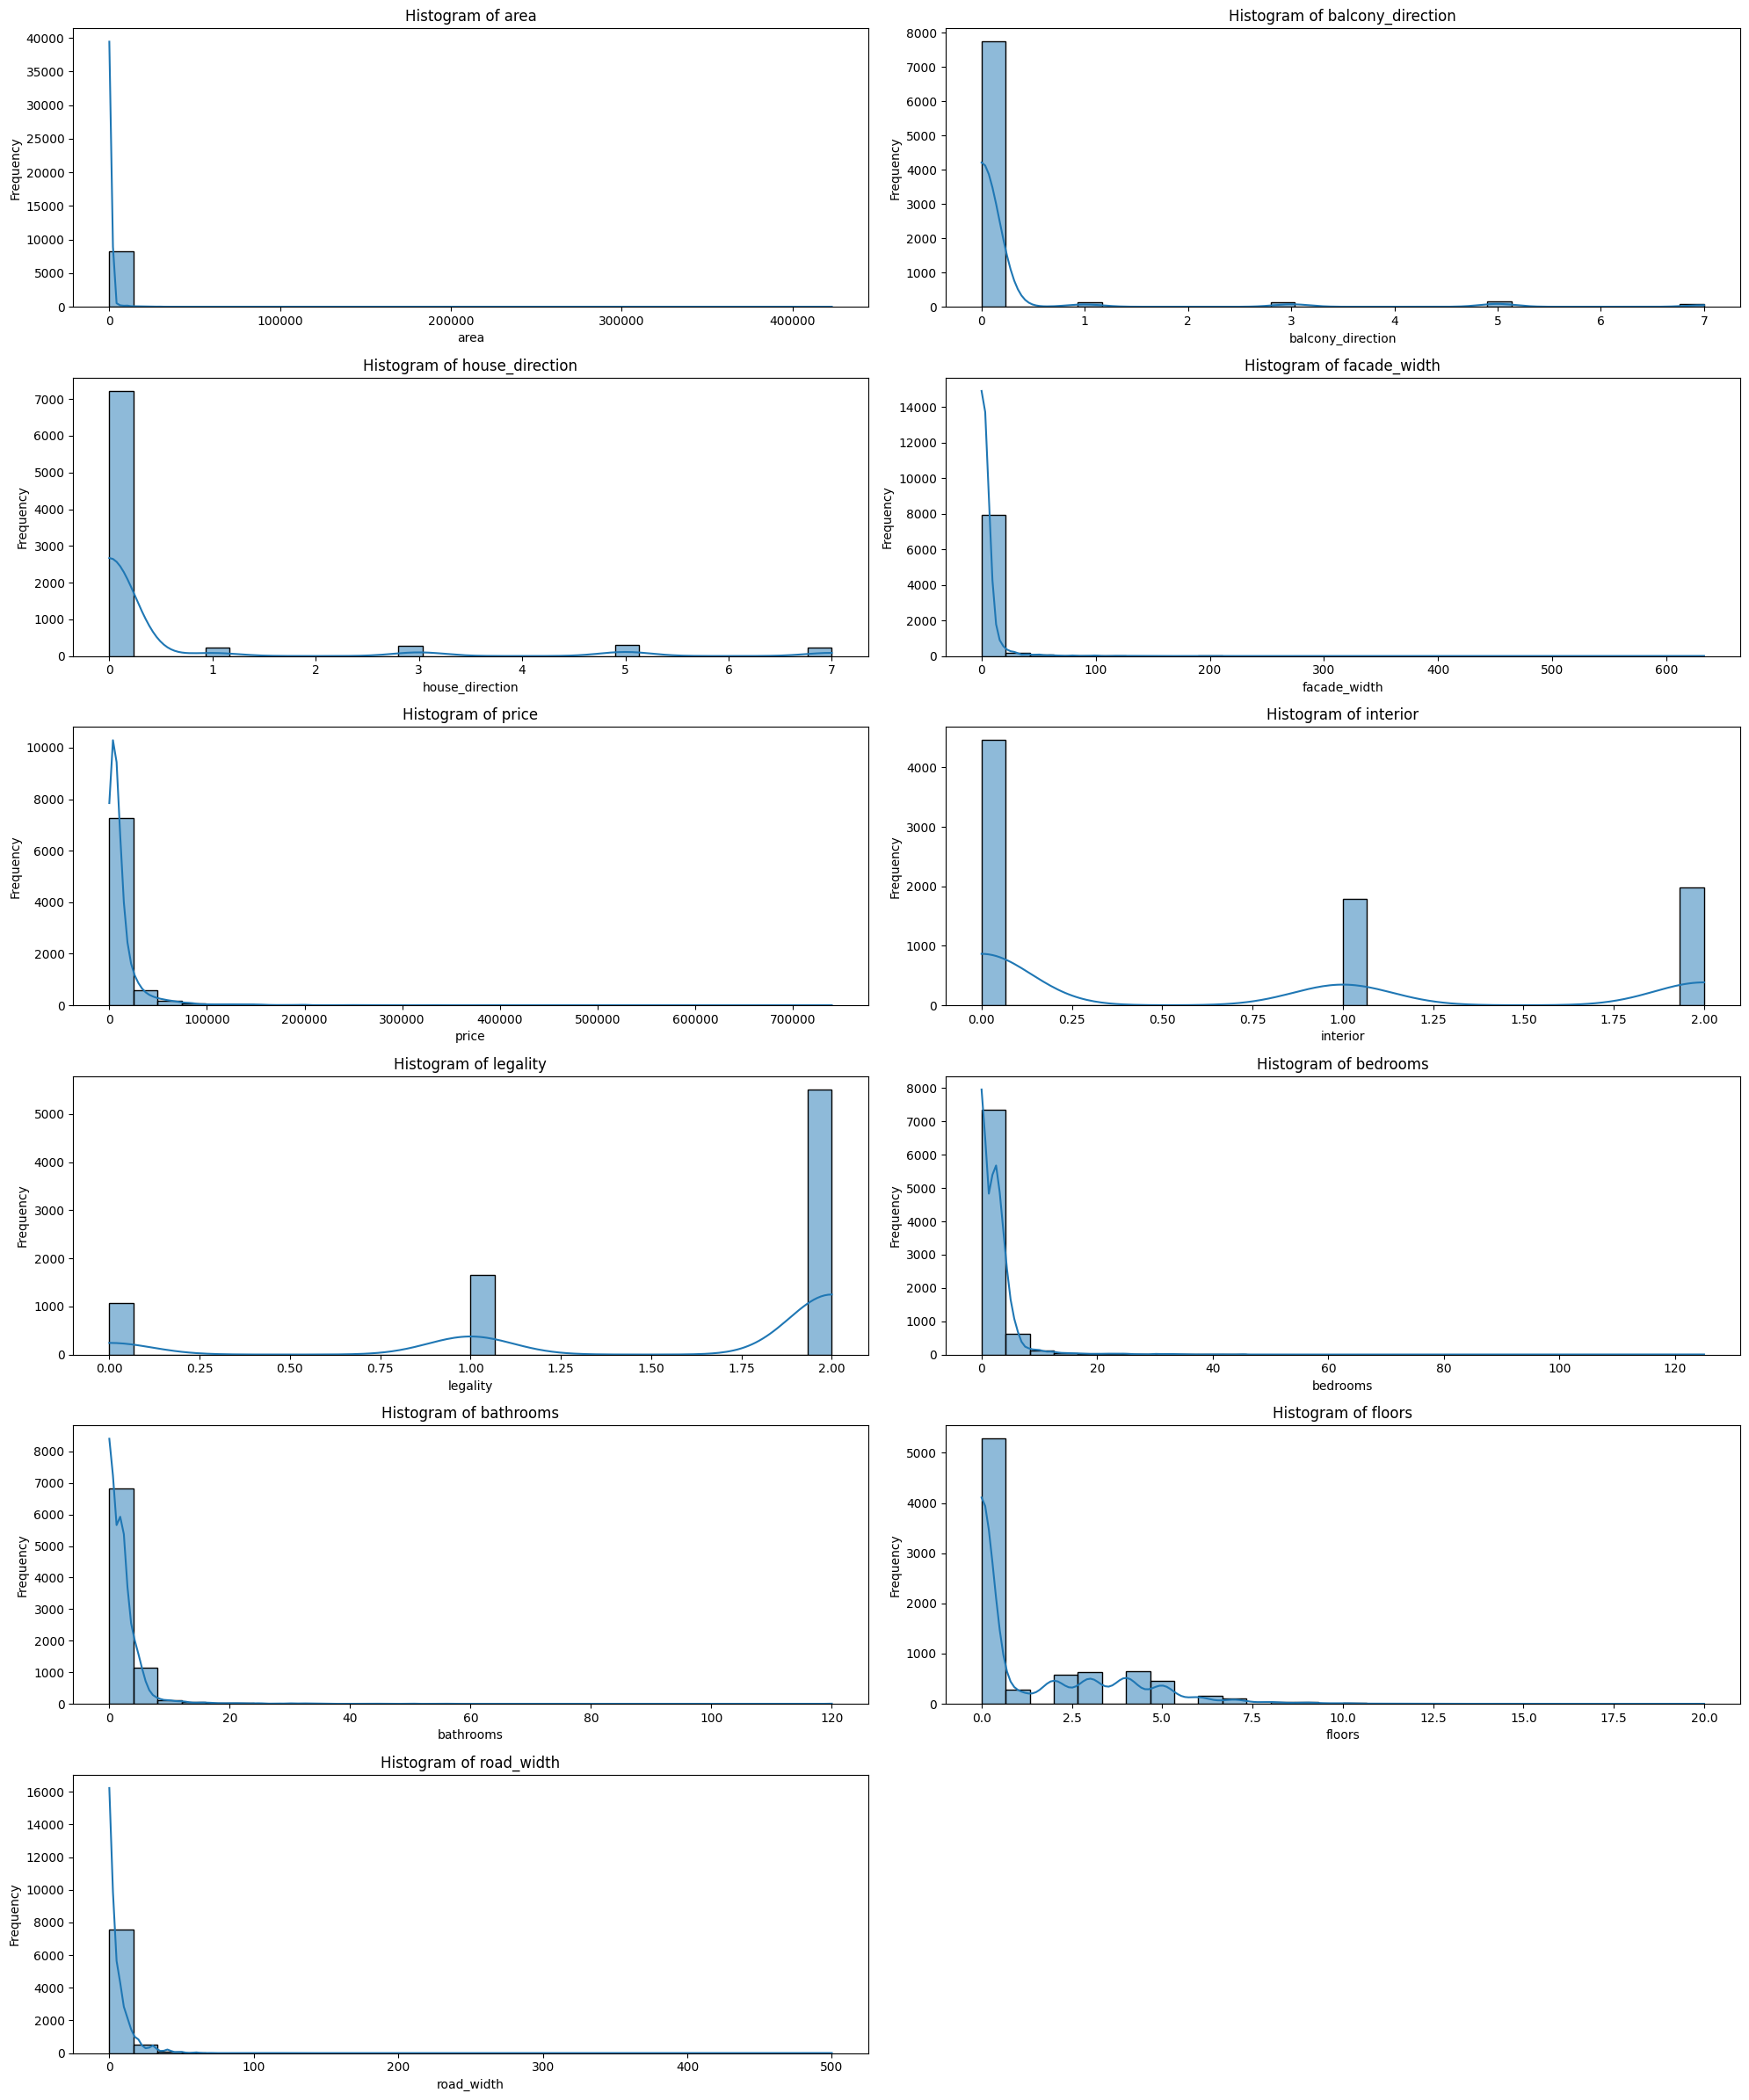

In [621]:
# Plot histograms for all numeric columns to check distributions and outliers

# Select only numeric columns for histograms
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Determine the layout for subplots
n_cols = 2  # Number of columns in subplot grid
n_rows = (len(numeric_cols) - 1) // n_cols + 1 # Calculate rows needed

plt.figure(figsize=(20, n_rows * 4)) # Adjust figure size based on number of rows

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Outlier remover using IQR

In [622]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Columns to remove outliers from
outlier_columns = ['area', 'bedrooms', 'floors', 'price', 'bathrooms', 'road_width', 'facade_width']

print(f"Shape before outlier removal: {df.shape}")

df_no_outliers = df.copy()
for col in outlier_columns:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, col)

print(f"Shape after outlier removal: {df_no_outliers.shape}")

# Display summary statistics after outlier removal
print("\nSummary statistics after outlier removal:")
print(df_no_outliers[outlier_columns].describe())

Shape before outlier removal: (8234, 12)
Shape after outlier removal: (5613, 12)

Summary statistics after outlier removal:
         area  bedrooms  floors    price  bathrooms  road_width  facade_width
count 5613.00   5613.00 5613.00  5613.00    5613.00     5613.00       5613.00
mean    83.13      1.90    1.03  5689.09       1.62        2.61          2.06
std     39.80      1.54    1.68  4191.79       1.43        3.95          2.68
min      7.00      0.00    0.00     0.00       0.00        0.00          0.00
25%     57.00      0.00    0.00  2690.00       0.00        0.00          0.00
50%     75.00      2.00    0.00  4750.00       2.00        0.00          0.00
75%    100.00      3.00    2.00  7500.00       2.00        5.00          4.00
max    260.00      7.00    7.00 19900.00       5.00       15.00         10.00


## Histograms After Outlier Removal

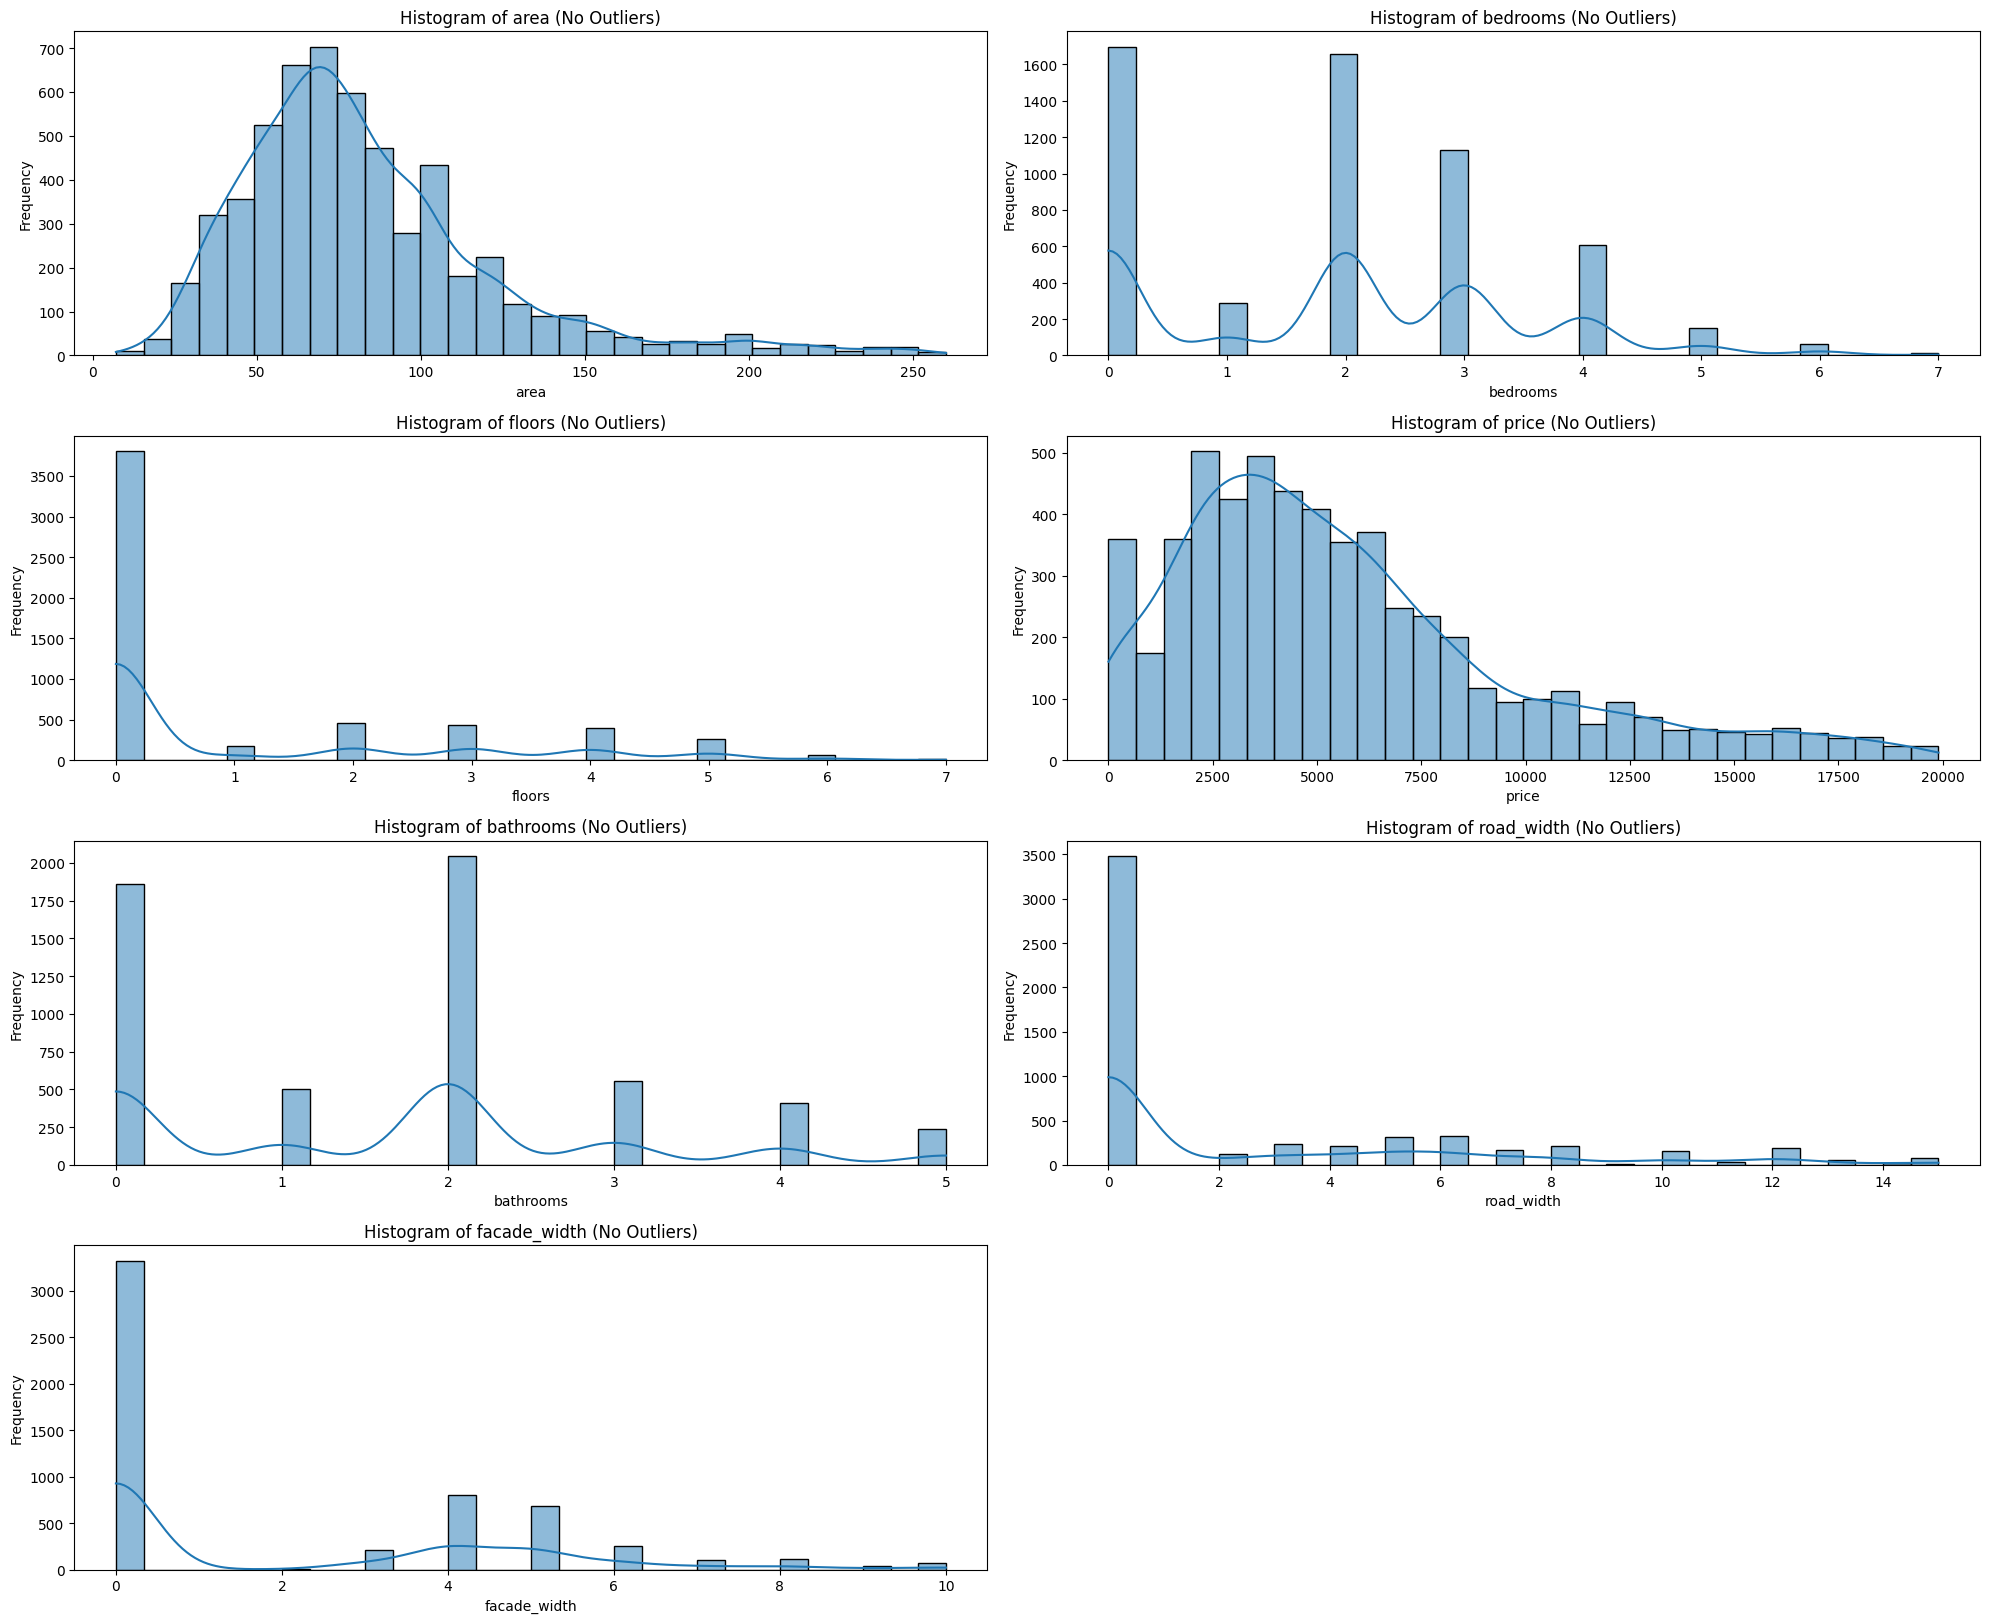

In [623]:
# Plot histograms for the columns after outlier removal
plt.figure(figsize=(20, n_rows * 4)) # n_rows and n_cols are defined in the previous histogram cell

for i, col in enumerate(outlier_columns): # Use the same outlier_columns list
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_no_outliers[col], kde=True, bins=30)
    plt.title(f'Histogram of {col} (No Outliers)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Create price per m2 column

In [624]:
# Calculate price per m²
df_no_outliers['price_per_m2'] = df_no_outliers['price'] / df_no_outliers['area']

# Display the DataFrame with the new column
print("\nDataFrame with 'price_per_m2' column:")
print(df_no_outliers[['area', 'price', 'price_per_m2']].head())

print("\nSummary statistics for 'price_per_m2':")
print(df_no_outliers['price_per_m2'].describe())


DataFrame with 'price_per_m2' column:
    area   price  price_per_m2
1  65.00 3400.00         52.31
2  50.00 6550.00        131.00
4  62.00 1990.00         32.10
6 120.00 7300.00         60.83
7  77.10 3300.00         42.80

Summary statistics for 'price_per_m2':
count   5613.00
mean      81.31
std       68.14
min        0.00
25%       38.71
50%       63.16
75%      102.42
max      725.00
Name: price_per_m2, dtype: float64


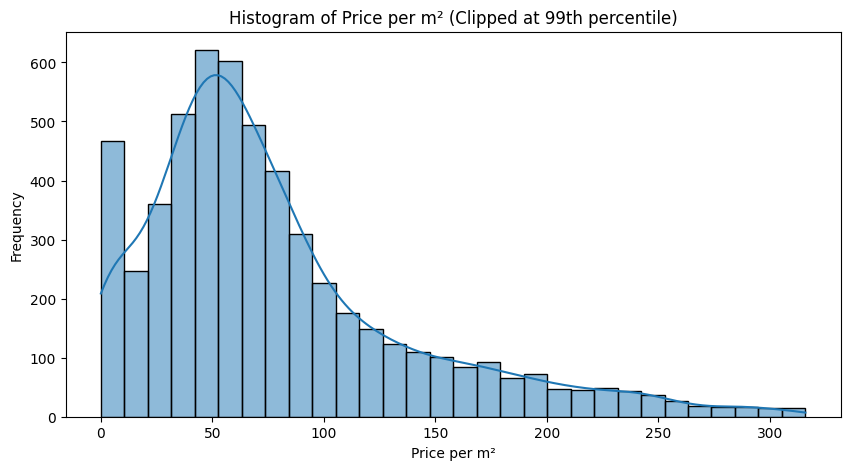

In [625]:
# Improved price_per_m2 histogram (clip top 1% to reduce skew)
upper_limit = df_no_outliers['price_per_m2'].quantile(0.99)
plt.figure(figsize=(10, 5))
sns.histplot(df_no_outliers[df_no_outliers['price_per_m2'] <= upper_limit]['price_per_m2'], kde=True, bins=30)
plt.title('Histogram of Price per m² (Clipped at 99th percentile)')
plt.xlabel('Price per m²')
plt.ylabel('Frequency')
plt.show()

## Correlation with price per m2


Correlation with price_per_m2:
                   price_per_m2
price_per_m2               1.00
floors                     0.62
bathrooms                  0.30
bedrooms                   0.29
interior                   0.11
legality                   0.11
road_width                 0.05
facade_width               0.05
balcony_direction         -0.01
house_direction           -0.06


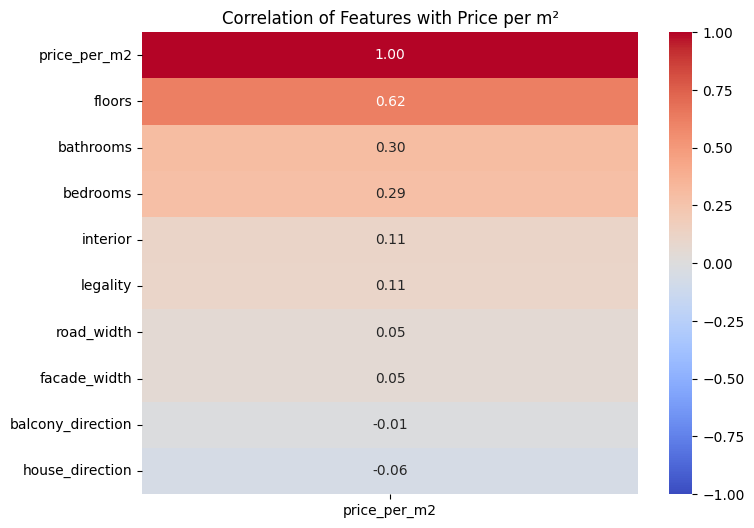

In [626]:

# Calculate correlation with price_per_m2
# Select relevant columns for correlation
# Exclude original price, address, non-encoded address parts, area, and price_converted
correlation_cols = [
    'balcony_direction', 'house_direction', 'facade_width', 'interior',
    'legality', 'bedrooms', 'bathrooms', 'floors', 'road_width', 'price_per_m2'
]

# Ensure all selected columns are present in df_no_outliers
existing_correlation_cols = [col for col in correlation_cols if col in df_no_outliers.columns]

if not existing_correlation_cols or 'price_per_m2' not in existing_correlation_cols:
    print("Price_per_m2 or other critical columns for correlation are missing from df_no_outliers.")
else:
    correlation_matrix = df_no_outliers[existing_correlation_cols].corr()
    price_per_m2_corr = correlation_matrix[['price_per_m2']].sort_values(by='price_per_m2', ascending=False)

    print("\nCorrelation with price_per_m2:")
    print(price_per_m2_corr)

    # Plotting the correlation
    plt.figure(figsize=(8, 6))
    sns.heatmap(price_per_m2_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Correlation of Features with Price per m²')
    plt.show()
